In [1]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [2]:
import pandas as pd
from urlparse import urlparse
import tldextract
from collections import Counter
import jieba
import json
import math
import numpy as np
from time import time

In [3]:
df = pd.read_csv('../data/final/huizhou-final-v2.csv')

In [4]:
df.info()

In [5]:
import jieba.analyse
import numpy as np

msk = np.random.rand(len(df)) < 0.01

check = df[msk]
check.info()

In [6]:
jieba.analyse.set_stop_words('../data/stop_words/chinese_stops.txt')

In [7]:
from time import time
topK = 100
withWeight = True
def map_key_words(x):
    return jieba.analyse.extract_tags(x, topK=100, withWeight=True)
        #tmp = [t[0] for t in ret]
        #print ' '.join(tmp)
        #print check.iloc[i]['title']

In [102]:
t = df.iloc[1]['content']
ret = map_key_words(t)
v1 = [s[0] for s in ret]
v2 = [s[1] for s in ret]
print t
print '++++++++++++'
print ' '.join(v1)
print v2


In [14]:
# encoding=utf-8  
import networkx as nx  
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer  
  
def cut_sentence(sentence):  
    """ 
    分句 
    :param sentence: 
    :return: 
    """  
    if not isinstance(sentence, unicode):  
        sentence = sentence.decode('utf-8')  
    delimiters = frozenset(u'。！？')  
    buf = []  
    for ch in sentence:  
        buf.append(ch)  
        if delimiters.__contains__(ch):  
            yield ''.join(buf)  
            buf = []  
    if buf:  
        yield ''.join(buf)  
  
  
def load_stopwords(path='../data/stop_words/chinese_stops.txt'):  
    """ 
    加载停用词 
    :param path: 
    :return: 
    """  
    with open(path) as f:  
        stopwords = filter(lambda x: x, map(lambda x: x.strip().decode('utf-8'), f.readlines()))  
    stopwords.extend([' ', '\t', '\n'])  
    return frozenset(stopwords)  
  
def cut_words(sentence):  
    """ 
    分词 
    :param sentence: 
    :return: 
    """  
    stopwords = load_stopwords()  
    return filter(lambda x: not stopwords.__contains__(x), jieba.cut(sentence))  
  
def get_abstract(content, size=3):  
    """ 
    利用textrank提取摘要 
    :param content: 
    :param size: 
    :return: 
    """  
    docs = list(cut_sentence(content))  
    
    #tfidf_model = TfidfVectorizer(tokenizer=jieba.cut, stop_words=load_stopwords())  
    tfidf_model = TfidfVectorizer()  
    tfidf_matrix = tfidf_model.fit_transform(docs)  
    normalized_matrix = TfidfTransformer().fit_transform(tfidf_matrix)  
    similarity = nx.from_scipy_sparse_matrix(normalized_matrix * normalized_matrix.T)  
    scores = nx.pagerank(similarity)  
    tops = sorted(scores.iteritems(), key=lambda x: x[1], reverse=True)  
    size = min(size, len(docs))  
    indices = map(lambda x: x[0], tops)[:size]  
    return map(lambda idx: docs[idx], indices)  


In [128]:
import codecs
from textrank4zh import TextRank4Keyword, TextRank4Sentence

def get_abstract2(x):
    tr4s = TextRank4Sentence()
    tr4s.analyze(text=x, lower=True, source = 'all_filters')
    ret = list()
    for item in tr4s.get_key_sentences(num=3):
        ret.append(item.sentence)
    return '**********'.join(ret)

def get_key_words(x):
    tr4w = TextRank4Keyword()
    ret = tr4w.get_keywords(100, word_min_len=1)
    if len(ret) > 0:
        print(item.word, item.weight)

In [95]:
from time import time
t0 = time()
for i in range(0, 10):
    print i, '+++++++++++++++++'
    print df.iloc[i]['content']
    r = get_key_words(df.iloc[i]['content'])
    #print r
    #print '-----------------'
time() - t0

TypeError: 'NoneType' object is not iterable

In [129]:
from time import time
t0 = time()
for i in range(0, 10):
    print i, '+++++++++++++++++'
    print df.iloc[i]['title']
    r = get_abstract2(df.iloc[i]['content'])
    print r
    print '-----------------'
time() - t0

10.994549036026001

In [35]:
print r

In [19]:
import genius

In [83]:
for i in range(0, 1):
    t = df.iloc[i]['content']
    
    seg_list = genius.seg_keywords(t.decode('utf-8'))
    print '\n'.join(['%s\t%s' % (word.text, word.tagging) for word in seg_list])
    

In [64]:
import RAKE

In [66]:
Rake = RAKE.Rake('../data/stop_words/chinese_stops.txt');

In [117]:
ret = Rake.run( df.iloc[1]['content'])

In [118]:
s, r = zip(*ret)

In [120]:
print s

In [103]:
df.head()

,id,content,title,_version_,cache,segment,digest,boost,tstamp,url,domain,abstract
0,http://www.qulishi.com/news/201701/157485.html,隋炀帝的萧皇后生性风流：暗中与宇文化及通奸 趣历史首页 | 讲述历史上那些有趣的事 人物 ...,隋炀帝的萧皇后生性风流：暗中与宇文化及通奸,1564486876469919744,NaN,20170412122707,ecd2712cad80f2f7ba385735b16cabc7,0.000215,2017-04-12T15:17:54.992Z,http://www.qulishi.com/news/201701/157485.html,qulishi.com,[以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年...
1,http://www.qulishi.com/news/201701/157540.html,文宣宗高洋：怀揣着爱妃的头颅去赴宴 趣历史首页 | 讲述历史上那些有趣的事 人物 - 专题...,文宣宗高洋：怀揣着爱妃的头颅去赴宴,1564486876479356928,NaN,20170412122707,af9404764d79eab086f9bb94f01881eb,0.000557,2017-04-12T15:06:42.749Z,http://www.qulishi.com/news/201701/157540.html,qulishi.com,[以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年...
2,http://www.qulishi.com/news/201701/157669.html,元朝皇帝成吉思汗死后为何没有留下一座陵墓 趣历史首页 | 讲述历史上那些有趣的事 人物 -...,元朝皇帝成吉思汗死后为何没有留下一座陵墓,1564486876490891264,NaN,20170412122707,0812de487aaaf822cd7c17bceafcdc12,0.000175,2017-04-12T13:35:59.291Z,http://www.qulishi.com/news/201701/157669.html,qulishi.com,[以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年...
3,http://www.qulishi.com/news/201701/157806.html,贞观之治背后真相：隋朝遗产养肥李世民？ 趣历史首页 | 讲述历史上那些有趣的事 人物 - ...,贞观之治背后真相：隋朝遗产养肥李世民？,1564486876501377024,NaN,20170412122707,bbfb992815a03543f78ee13ae88e4ba9,0.001001,2017-04-12T14:45:41.4Z,http://www.qulishi.com/news/201701/157806.html,qulishi.com,"[贞观之治背后真相：隋朝遗产养肥李世民？, · 贞观之治背后真相：隋朝遗产养肥李世民？, ..."
4,http://www.qulishi.com/news/201701/158004.html,欧阳修的治学之道：身为文坛宗主为何不多读书？ 趣历史首页 | 讲述历史上那些有趣的事 人物...,欧阳修的治学之道：身为文坛宗主为何不多读书？,1564486876511862784,NaN,20170412122707,b682dc31d36e8d542f69be23dcbfc20c,0.000191,2017-04-12T15:21:46.147Z,http://www.qulishi.com/news/201701/158004.html,qulishi.com,[以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年...


In [15]:
t0 = time()
df['abstract'] = df.content.map(lambda x: get_abstract(x))
time() - t0

5956.621730089188

In [97]:
t0 = time()
df['key_words'] = df.content.map(lambda x: map_key_words(x))
time() - t0

3651.1784961223602

In [29]:
df.head()

,id,content,title,_version_,cache,segment,digest,boost,tstamp,url,domain,content_seg,abstract,key_words
0,http://www.qulishi.com/news/201701/157485.html,隋炀帝的萧皇后生性风流：暗中与宇文化及通奸 趣历史首页 | 讲述历史上那些有趣的事 人物 ...,隋炀帝的萧皇后生性风流：暗中与宇文化及通奸,1564486876469919744,NaN,20170412122707,ecd2712cad80f2f7ba385735b16cabc7,0.000215,2017-04-12T15:17:54.992Z,http://www.qulishi.com/news/201701/157485.html,qulishi.com,隋炀帝 的 萧皇后 生性 风流 ： 暗中 与 宇文化及 通奸 趣 历史 首页 | ...,[以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年...,"[(详情, 0.265289298874), (公主, 0.0599720287907), ..."
1,http://www.qulishi.com/news/201701/157540.html,文宣宗高洋：怀揣着爱妃的头颅去赴宴 趣历史首页 | 讲述历史上那些有趣的事 人物 - 专题...,文宣宗高洋：怀揣着爱妃的头颅去赴宴,1564486876479356928,NaN,20170412122707,af9404764d79eab086f9bb94f01881eb,0.000557,2017-04-12T15:06:42.749Z,http://www.qulishi.com/news/201701/157540.html,qulishi.com,文宣宗 高洋 ： 怀揣 着 爱妃 的 头颅 去 赴宴 趣 历史 首页 | 讲...,[以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年...,"[(详情, 0.274980822213), (揭秘, 0.0674655735676), ..."
2,http://www.qulishi.com/news/201701/157669.html,元朝皇帝成吉思汗死后为何没有留下一座陵墓 趣历史首页 | 讲述历史上那些有趣的事 人物 -...,元朝皇帝成吉思汗死后为何没有留下一座陵墓,1564486876490891264,NaN,20170412122707,0812de487aaaf822cd7c17bceafcdc12,0.000175,2017-04-12T13:35:59.291Z,http://www.qulishi.com/news/201701/157669.html,qulishi.com,元朝 皇帝 成吉思汗 死后 为何 没有 留下 一座 陵墓 趣 历史 首页 | ...,[以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年...,"[(详情, 0.281985828173), (皇帝, 0.0814485336764), ..."
3,http://www.qulishi.com/news/201701/157806.html,贞观之治背后真相：隋朝遗产养肥李世民？ 趣历史首页 | 讲述历史上那些有趣的事 人物 - ...,贞观之治背后真相：隋朝遗产养肥李世民？,1564486876501377024,NaN,20170412122707,bbfb992815a03543f78ee13ae88e4ba9,0.001001,2017-04-12T14:45:41.4Z,http://www.qulishi.com/news/201701/157806.html,qulishi.com,贞观之治 背后 真相 ： 隋朝 遗产 养肥 李世民 ？ 趣 历史 首页 | ...,"[贞观之治背后真相：隋朝遗产养肥李世民？, · 贞观之治背后真相：隋朝遗产养肥李世民？, ...","[(详情, 0.269468080192), (李世民, 0.0748044339964),..."
4,http://www.qulishi.com/news/201701/158004.html,欧阳修的治学之道：身为文坛宗主为何不多读书？ 趣历史首页 | 讲述历史上那些有趣的事 人物...,欧阳修的治学之道：身为文坛宗主为何不多读书？,1564486876511862784,NaN,20170412122707,b682dc31d36e8d542f69be23dcbfc20c,0.000191,2017-04-12T15:21:46.147Z,http://www.qulishi.com/news/201701/158004.html,qulishi.com,欧阳修 的 治学 之道 ： 身为 文坛 宗主 为何 不 多 读书 ？ 趣 历史 首页 ...,[以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年...,"[(详情, 0.267425688301), (欧阳修, 0.196709235807), ..."


In [18]:
print ' '.join(df.iloc[1]['abstract'])

In [158]:
key_words = [t[0] for t in df.iloc[8]['key_words']]

In [137]:
df.head()

,id,content,title,_version_,cache,segment,digest,boost,tstamp,url,...,abstract_len,abstract_s,w2v_centroid,w2v_centroid_n,gxwh_w2v_sim,lishi_w2v_sim,yishu_w2v_sim,renwu_w2v_sim,gushi_w2v_sim,key_words_s
0,http://www.qulishi.com/news/201701/157485.html,隋炀帝的萧皇后生性风流：暗中与宇文化及通奸 趣历史首页 | 讲述历史上那些有趣的事 人物 ...,隋炀帝的萧皇后生性风流：暗中与宇文化及通奸,1564486876469919744,NaN,20170412122707,ecd2712cad80f2f7ba385735b16cabc7,0.000215,2017-04-12T15:17:54.992Z,http://www.qulishi.com/news/201701/157485.html,...,667,以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年，...,"[-0.00897889, 0.0148242, 0.0326216, -0.0117419...","[-0.0293764, 0.0485007, 0.106729, -0.0384162, ...",0.043740,0.509463,-0.126326,0.195160,0.327964,"(u'\u8be6\u60c5', 0.28526307630275893);(u'\u51..."
1,http://www.qulishi.com/news/201701/157540.html,文宣宗高洋：怀揣着爱妃的头颅去赴宴 趣历史首页 | 讲述历史上那些有趣的事 人物 - 专题...,文宣宗高洋：怀揣着爱妃的头颅去赴宴,1564486876479356928,NaN,20170412122707,af9404764d79eab086f9bb94f01881eb,0.000557,2017-04-12T15:06:42.749Z,http://www.qulishi.com/news/201701/157540.html,...,731,以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年，...,"[-0.00570392, 0.0160906, 0.0384237, -0.0132063...","[-0.0181728, 0.0512649, 0.122419, -0.0420756, ...",0.043145,0.517394,-0.117858,0.192437,0.344010,"(u'\u8be6\u60c5', 0.29084782483418853);(u'\u63..."
2,http://www.qulishi.com/news/201701/157669.html,元朝皇帝成吉思汗死后为何没有留下一座陵墓 趣历史首页 | 讲述历史上那些有趣的事 人物 -...,元朝皇帝成吉思汗死后为何没有留下一座陵墓,1564486876490891264,NaN,20170412122707,0812de487aaaf822cd7c17bceafcdc12,0.000175,2017-04-12T13:35:59.291Z,http://www.qulishi.com/news/201701/157669.html,...,667,以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年，...,"[-0.00417784, 0.0210333, 0.0404414, -0.015287,...","[-0.0118479, 0.0596482, 0.114687, -0.0433525, ...",0.061091,0.532680,-0.109404,0.187445,0.329215,"(u'\u8be6\u60c5', 0.3020522354217014);(u'\u768..."
3,http://www.qulishi.com/news/201701/157806.html,贞观之治背后真相：隋朝遗产养肥李世民？ 趣历史首页 | 讲述历史上那些有趣的事 人物 - ...,贞观之治背后真相：隋朝遗产养肥李世民？,1564486876501377024,NaN,20170412122707,bbfb992815a03543f78ee13ae88e4ba9,0.001001,2017-04-12T14:45:41.4Z,http://www.qulishi.com/news/201701/157806.html,...,65,贞观之治背后真相：隋朝遗产养肥李世民？ · 贞观之治背后真相：隋朝遗产养肥李世民？ · ...,"[-0.00909219, 0.00917837, 0.0345166, -0.010143...","[-0.027703, 0.0279656, 0.105169, -0.0309068, -...",0.079271,0.510026,-0.103174,0.187760,0.316548,"(u'\u8be6\u60c5', 0.2886173967296319);(u'\u674..."
4,http://www.qulishi.com/news/201701/158004.html,欧阳修的治学之道：身为文坛宗主为何不多读书？ 趣历史首页 | 讲述历史上那些有趣的事 人物...,欧阳修的治学之道：身为文坛宗主为何不多读书？,1564486876511862784,NaN,20170412122707,b682dc31d36e8d542f69be23dcbfc20c,0.000191,2017-04-12T15:21:46.147Z,http://www.qulishi.com/news/201701/158004.html,...,667,以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年，...,"[-0.00883886, 0.0107681, 0.0271631, -0.0194534...","[-0.0283275, 0.0345105, 0.0870546, -0.0623459,...",0.109489,0.487316,-0.065842,0.201413,0.348539,"(u'\u8be6\u60c5', 0.2878815033162468);(u'\u6b2..."


In [140]:
for i in range(0, 100):
    t = df.iloc[i]['abstract_s']
    print i, t

In [72]:
r = df.iloc[8]['key_words']

In [77]:
r[0]

(u'\u8be6\u60c5', 0.2553304513808955)

In [78]:
a = '\u8be6\u60c5'
b = 0.2553304513808955
(a, b)

('\\u8be6\\u60c5', 0.2553304513808955)

In [100]:
type(r[0][0])

unicode

In [41]:
sum(key_words)

3.2790112413142007

In [81]:
def map_serialize(x):
    #print len(x)
    ret = []
    idx = 0
    for v in x:
        #print idx, v
        ret.append(str(v))
        idx += 1
    #print ret
    return ';'.join(ret)

In [62]:
ret = map_serialize(df.iloc[2]['key_words'])

In [71]:
ret[1]

'u'

In [174]:
def deserialize(x):
    #print x
    ret = []
    vals = x.split(';')
    
    cnt = 0
    for val in vals:
        t = []
        s = val.strip('()')
        v = s.split(',')
        print cnt, v[0], v[1]
        #print '-----'
        t.append(eval(v[0].encode('utf-8')))
        t.append(float(v[1]))        
        cnt += 1
        ret.append(t)
    return np.asarray(ret)

In [175]:
aa = unicode(u'\u8be6\u60c5')
print aa

In [176]:
a = deserialize(ret)

In [177]:
t = a[0][0]
print t, unicode(t)

In [94]:
round(0.011646144669167071,6)

0.011646

In [178]:
ss = [t[0] for t in a]

In [179]:
print type(ss[0].decode('utf-8')), ss[0].decode('utf-8')

In [173]:
print ' '.join(ss)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264832 entries, 0 to 264831
Data columns (total 14 columns):
id             264832 non-null object
content        264832 non-null object
title          264832 non-null object
_version_      264832 non-null int64
cache          260 non-null object
segment        264832 non-null int64
digest         264832 non-null object
boost          264832 non-null float64
tstamp         264832 non-null object
url            264832 non-null object
domain         264832 non-null object
content_seg    264832 non-null object
abstract       264832 non-null object
key_words      264832 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 28.3+ MB


In [127]:
df['key_words_s'] = df.key_words.map(lambda x: map_serialize(x))

In [128]:
df['abstract_s'] = df.abstract.map(lambda x: ' '.join(x))

In [40]:
df.head()

,id,content,title,_version_,cache,segment,digest,boost,tstamp,url,domain,abstract,key_words,abstract_len,abstract_s
0,http://www.qulishi.com/news/201701/157485.html,隋炀帝的萧皇后生性风流：暗中与宇文化及通奸 趣历史首页 | 讲述历史上那些有趣的事 人物 ...,隋炀帝的萧皇后生性风流：暗中与宇文化及通奸,1564486876469919744,NaN,20170412122707,ecd2712cad80f2f7ba385735b16cabc7,0.000215,2017-04-12T15:17:54.992Z,http://www.qulishi.com/news/201701/157485.html,qulishi.com,[以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年...,"[(详情, 0.285263076303), (公主, 0.0644873558699), ...",3,以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年，...
1,http://www.qulishi.com/news/201701/157540.html,文宣宗高洋：怀揣着爱妃的头颅去赴宴 趣历史首页 | 讲述历史上那些有趣的事 人物 - 专题...,文宣宗高洋：怀揣着爱妃的头颅去赴宴,1564486876479356928,NaN,20170412122707,af9404764d79eab086f9bb94f01881eb,0.000557,2017-04-12T15:06:42.749Z,http://www.qulishi.com/news/201701/157540.html,qulishi.com,[以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年...,"[(详情, 0.290847824834), (揭秘, 0.0713584866225), ...",3,以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年，...
2,http://www.qulishi.com/news/201701/157669.html,元朝皇帝成吉思汗死后为何没有留下一座陵墓 趣历史首页 | 讲述历史上那些有趣的事 人物 -...,元朝皇帝成吉思汗死后为何没有留下一座陵墓,1564486876490891264,NaN,20170412122707,0812de487aaaf822cd7c17bceafcdc12,0.000175,2017-04-12T13:35:59.291Z,http://www.qulishi.com/news/201701/157669.html,qulishi.com,[以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年...,"[(详情, 0.302052235422), (皇帝, 0.087244496747), (...",3,以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年，...
3,http://www.qulishi.com/news/201701/157806.html,贞观之治背后真相：隋朝遗产养肥李世民？ 趣历史首页 | 讲述历史上那些有趣的事 人物 - ...,贞观之治背后真相：隋朝遗产养肥李世民？,1564486876501377024,NaN,20170412122707,bbfb992815a03543f78ee13ae88e4ba9,0.001001,2017-04-12T14:45:41.4Z,http://www.qulishi.com/news/201701/157806.html,qulishi.com,"[贞观之治背后真相：隋朝遗产养肥李世民？, · 贞观之治背后真相：隋朝遗产养肥李世民？, ...","[(详情, 0.28861739673), (李世民, 0.0801202910135), ...",3,贞观之治背后真相：隋朝遗产养肥李世民？ · 贞观之治背后真相：隋朝遗产养肥李世民？ · ...
4,http://www.qulishi.com/news/201701/158004.html,欧阳修的治学之道：身为文坛宗主为何不多读书？ 趣历史首页 | 讲述历史上那些有趣的事 人物...,欧阳修的治学之道：身为文坛宗主为何不多读书？,1564486876511862784,NaN,20170412122707,b682dc31d36e8d542f69be23dcbfc20c,0.000191,2017-04-12T15:21:46.147Z,http://www.qulishi.com/news/201701/158004.html,qulishi.com,[以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年...,"[(详情, 0.287881503316), (欧阳修, 0.21175583722), (...",3,以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年，...


In [129]:
df = df[df['abstract_len'] < 6000]

In [130]:
df = df[df['gxwh_w2v_sim'] > 0]

In [131]:
df.info()

In [135]:
df_out = df[['url', 'title', 'abstract_s', 'key_words_s', 'w2v_centroid_n']]

In [133]:
df_out.head()

,url,title,abstract_s,key_words_s
0,http://www.qulishi.com/news/201701/157485.html,隋炀帝的萧皇后生性风流：暗中与宇文化及通奸,以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年，...,"(u'\u8be6\u60c5', 0.28526307630275893);(u'\u51..."
1,http://www.qulishi.com/news/201701/157540.html,文宣宗高洋：怀揣着爱妃的头颅去赴宴,以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年，...,"(u'\u8be6\u60c5', 0.29084782483418853);(u'\u63..."
2,http://www.qulishi.com/news/201701/157669.html,元朝皇帝成吉思汗死后为何没有留下一座陵墓,以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年，...,"(u'\u8be6\u60c5', 0.3020522354217014);(u'\u768..."
3,http://www.qulishi.com/news/201701/157806.html,贞观之治背后真相：隋朝遗产养肥李世民？,贞观之治背后真相：隋朝遗产养肥李世民？ · 贞观之治背后真相：隋朝遗产养肥李世民？ · ...,"(u'\u8be6\u60c5', 0.2886173967296319);(u'\u674..."
4,http://www.qulishi.com/news/201701/158004.html,欧阳修的治学之道：身为文坛宗主为何不多读书？,以现在的地名来说，柳 详情 柳宗元资料介绍 柳宗元擅长于写什么 柳宗元生于公元773年，...,"(u'\u8be6\u60c5', 0.2878815033162468);(u'\u6b2..."


In [136]:
df_out.to_csv('../data/web/chinese-web-full_v1.csv', encoding='utf-8', index=False)

In [41]:
df['abstract_len'] = df['abstract_s'].str.len()

In [42]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline 

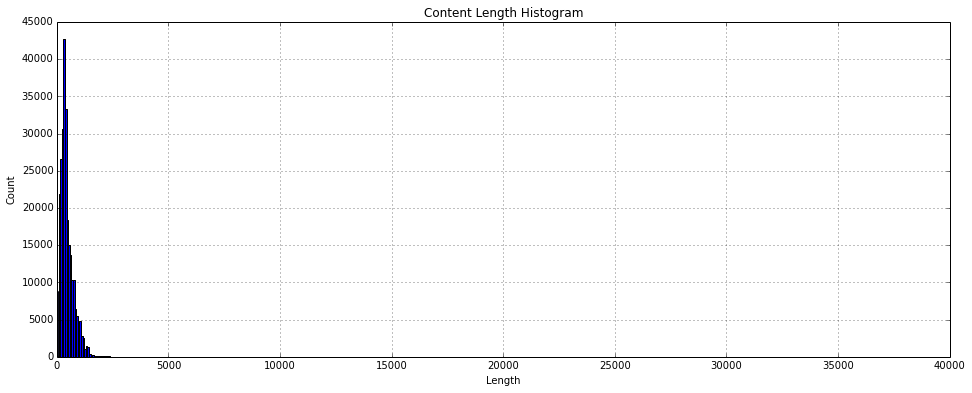

In [43]:
df['abstract_len'].hist(bins=500, figsize= (16, 6))
plt.title('Content Length Histogram')
plt.xlabel('Length')
plt.ylabel('Count')

In [37]:
df['abstract_len'].max()

3

In [194]:
test = df[df['abstract_len'] > 6000]

In [195]:
test.info()

In [44]:
from gensim.models import Word2Vec, KeyedVectors
model = KeyedVectors.load_word2vec_format('../data/w2v/chinese_model_format_v1.bin', binary=False)

In [45]:
def map_word2vec_centroid(x):
    global model
    x = x.items() #dict to tuple
    # remove out-of-vocabulary words
    doc = [(word, fq) for word, fq in x if word in model.vocab]   
    if len(doc) == 0:
        #print x
        return None
    #words, fq = zip(*doc)
    ret = [model[x] * y for x, y in doc]
    
    val = np.mean(ret, axis=0)
    #print ret
    
    #doc = [word for word in doc if word in word2vec_model.vocab]
    return val

In [46]:
def map_key_words_2_dict(x):
    keys = [t[0] for t in x]
    values = [t[1] for t in x]
    ret = dict()
    for i in range(0, len(keys)):
        ret[keys[i]] = values[i]
    return ret

In [47]:
def get_cosine2(vec1, vec2):    
    numerator = np.sum([a*b for a,b in zip(vec1,vec2)])
    return numerator

In [247]:
map_key_words_2_dict(df.iloc[1]['key_words'])

{u'10': 0.023292289338334143,
 u'102': 0.011646144669167071,
 u'12': 0.017469217003750606,
 u'15': 0.011646144669167071,
 u'47': 0.011646144669167071,
 u'500': 0.011646144669167071,
 u'700': 0.011646144669167071,
 u'773': 0.011646144669167071,
 u'819': 0.011646144669167071,
 u'\u4e00\u4f4d': 0.010205889389965903,
 u'\u4e07\u81f3': 0.011646144669167071,
 u'\u4e09\u56fd': 0.010423771836400388,
 u'\u4e09\u56fd\u6f14\u4e49': 0.01352599135825134,
 u'\u4e09\u987e\u8305\u5e90': 0.011298677602532878,
 u'\u4e0a\u53e4': 0.008597665695801266,
 u'\u4e1c\u5434': 0.011723733858061375,
 u'\u4e24\u664b': 0.009403002834807599,
 u'\u4e24\u6b21': 0.009059148764422795,
 u'\u4e2d\u56fd': 0.025067925802834876,
 u'\u4e2d\u671d': 0.009105504881032636,
 u'\u4e3a\u4ec0\u4e48': 0.012875598616975159,
 u'\u4e3a\u4f55': 0.04400834393245007,
 u'\u4e4b\u591c': 0.008435392729585971,
 u'\u4e4b\u6218': 0.0447986832641208,
 u'\u4e4b\u803b': 0.011646144669167071,
 u'\u4e4b\u8c1c': 0.01698761636956649,
 u'\u4e66\u753b': 0.

In [98]:
t0 = time()
df['w2v_centroid'] = df.key_words.map(lambda x: map_word2vec_centroid(map_key_words_2_dict(x)))
time() - t0

91.5643208026886

In [99]:
df.info()

In [100]:
df = df.dropna(subset =['w2v_centroid'])

In [101]:
def map_normalize(x):
    sum1= np.sum([x**2])
    return x/math.sqrt(sum1)

In [102]:
df['w2v_centroid_n'] = df.w2v_centroid.map(lambda x:map_normalize(x))

In [103]:
t0 = time()
ch_vec = model[u'国学']*0.5 + model[u'文化']*0.5 
ch_vec_n = map_normalize(ch_vec)
df['gxwh_w2v_sim'] = df.w2v_centroid_n.map(lambda x: get_cosine2(ch_vec_n, x))
print time() - t0

In [104]:
df['gxwh_w2v_sim'].min(), df['gxwh_w2v_sim'].max()

(-0.07510104775428772, 0.8712775707244873)

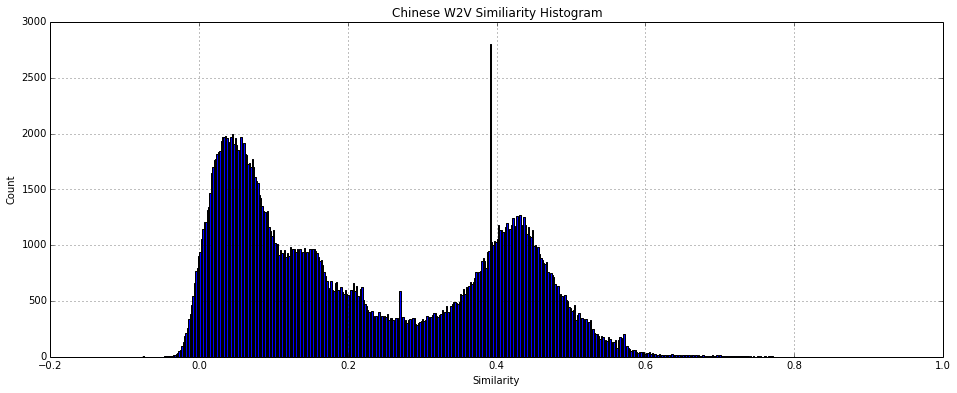

In [105]:
df['gxwh_w2v_sim'].hist(bins=500, figsize= (16, 6))
plt.title('Chinese W2V Similiarity Histogram')
plt.xlabel('Similarity')
plt.ylabel('Count')

In [106]:
ch_sim = df['gxwh_w2v_sim'].values.argsort()[::-1]

In [107]:
idx = 0
for i in ch_sim:
    if df.iloc[i]['gxwh_w2v_sim'] > 0.50 and idx < 10:
        title = df.iloc[i]['title']
        content = df.iloc[i]['content']
        sim_val = df.iloc[i]['gxwh_w2v_sim']
        idx += 1
        print idx, i, title, sim_val
        print  df.iloc[i]['url']
        print content
        print '--------------'

In [267]:
test = df[df['gxwh_w2v_sim'] < 0]

In [268]:
test.info()

In [108]:
t0 = time()
ch_vec = model[u'历史']
ch_vec_n = map_normalize(ch_vec)
df['lishi_w2v_sim'] = df.w2v_centroid_n.map(lambda x: get_cosine2(ch_vec_n, x))
print time() - t0

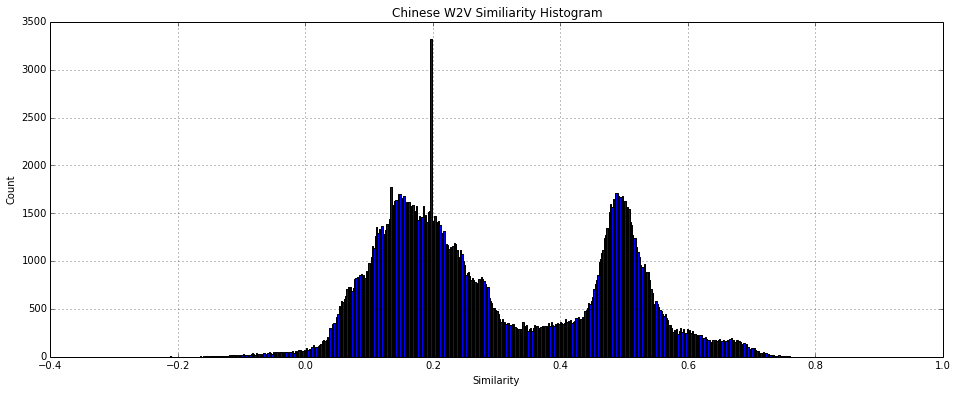

In [109]:
df['lishi_w2v_sim'].hist(bins=500, figsize= (16, 6))
plt.title('Chinese W2V Similiarity Histogram')
plt.xlabel('Similarity')
plt.ylabel('Count')

In [110]:
ch_sim = df['lishi_w2v_sim'].values.argsort()[::-1]

In [111]:
idx = 0
for i in ch_sim:
    if df.iloc[i]['lishi_w2v_sim'] > 0.60 and idx < 10:
        title = df.iloc[i]['title']
        content = df.iloc[i]['content']
        sim_val = df.iloc[i]['lishi_w2v_sim']
        idx += 1
        print idx, i, title, sim_val
        print  df.iloc[i]['url']
        print content
        print '--------------'

In [112]:
t0 = time()
ch_vec = model[u'艺术']
ch_vec_n = map_normalize(ch_vec)
df['yishu_w2v_sim'] = df.w2v_centroid_n.map(lambda x: get_cosine2(ch_vec_n, x))
print time() - t0

In [113]:
ch_sim = df['yishu_w2v_sim'].values.argsort()[::-1]

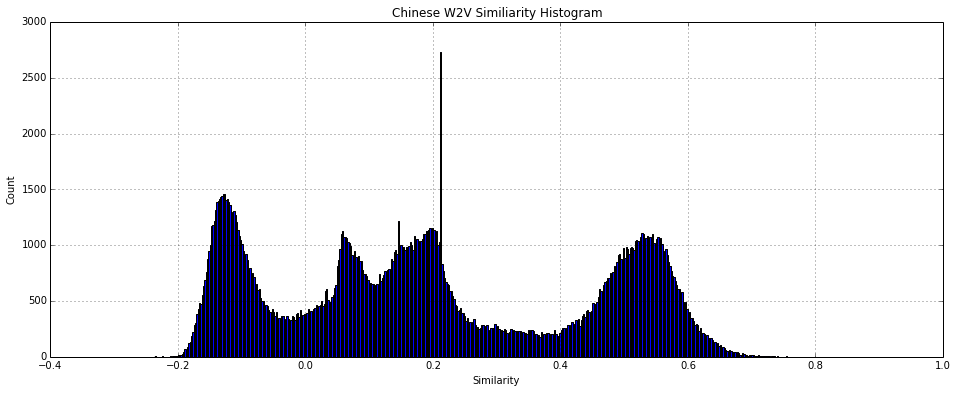

In [114]:
df['yishu_w2v_sim'].hist(bins=500, figsize= (16, 6))
plt.title('Chinese W2V Similiarity Histogram')
plt.xlabel('Similarity')
plt.ylabel('Count')

In [115]:
idx = 0
for i in ch_sim:
    if df.iloc[i]['yishu_w2v_sim'] > 0.50 and idx < 10:
        title = df.iloc[i]['title']
        content = df.iloc[i]['content']
        sim_val = df.iloc[i]['yishu_w2v_sim']
        idx += 1
        print idx, i, title, sim_val
        print  df.iloc[i]['url']
        print content
        print '--------------'

In [116]:
t0 = time()
ch_vec = model[u'人物']
ch_vec_n = map_normalize(ch_vec)
df['renwu_w2v_sim'] = df.w2v_centroid_n.map(lambda x: get_cosine2(ch_vec_n, x))
print time() - t0

In [117]:
ch_sim = df['renwu_w2v_sim'].values.argsort()[::-1]

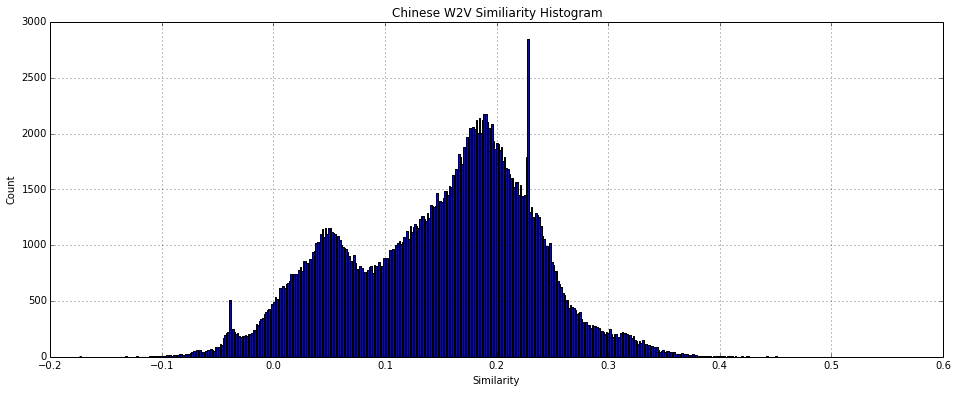

In [118]:
df['renwu_w2v_sim'].hist(bins=500, figsize= (16, 6))
plt.title('Chinese W2V Similiarity Histogram')
plt.xlabel('Similarity')
plt.ylabel('Count')

In [119]:
idx = 0
for i in ch_sim:
    if df.iloc[i]['renwu_w2v_sim'] > 0.30 and idx < 10:
        title = df.iloc[i]['title']
        content = df.iloc[i]['content']
        sim_val = df.iloc[i]['renwu_w2v_sim']
        idx += 1
        print idx, i, title, sim_val
        print  df.iloc[i]['url']
        print content
        print '--------------'

In [120]:
t0 = time()
ch_vec = model[u'故事']
ch_vec_n = map_normalize(ch_vec)
df['gushi_w2v_sim'] = df.w2v_centroid_n.map(lambda x: get_cosine2(ch_vec_n, x))
print time() - t0

In [121]:
ch_sim = df['gushi_w2v_sim'].values.argsort()[::-1]

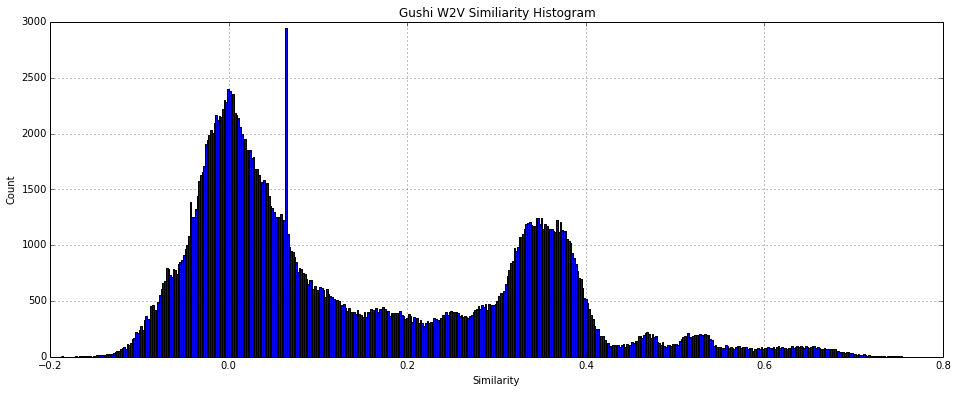

In [122]:
df['gushi_w2v_sim'].hist(bins=500, figsize= (16, 6))
plt.title('Gushi W2V Similiarity Histogram')
plt.xlabel('Similarity')
plt.ylabel('Count')

In [123]:
idx = 0
for i in ch_sim:
    if df.iloc[i]['gushi_w2v_sim'] > 0.50 and idx < 10:
        title = df.iloc[i]['title']
        content = df.iloc[i]['content']
        sim_val = df.iloc[i]['gushi_w2v_sim']
        idx += 1
        print idx, i, title, sim_val
        print  df.iloc[i]['url']
        print content
        print '--------------'